Part 1: Data Exploration and Preprocessing
1. Loading the Dataset:

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

In [33]:
# Load the dataset
df = pd.read_csv("BankChurners.csv")

2. Initial Exploration:

In [36]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

There is no missing values

In [8]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Data Preprocessing
1. Handling Missing Values

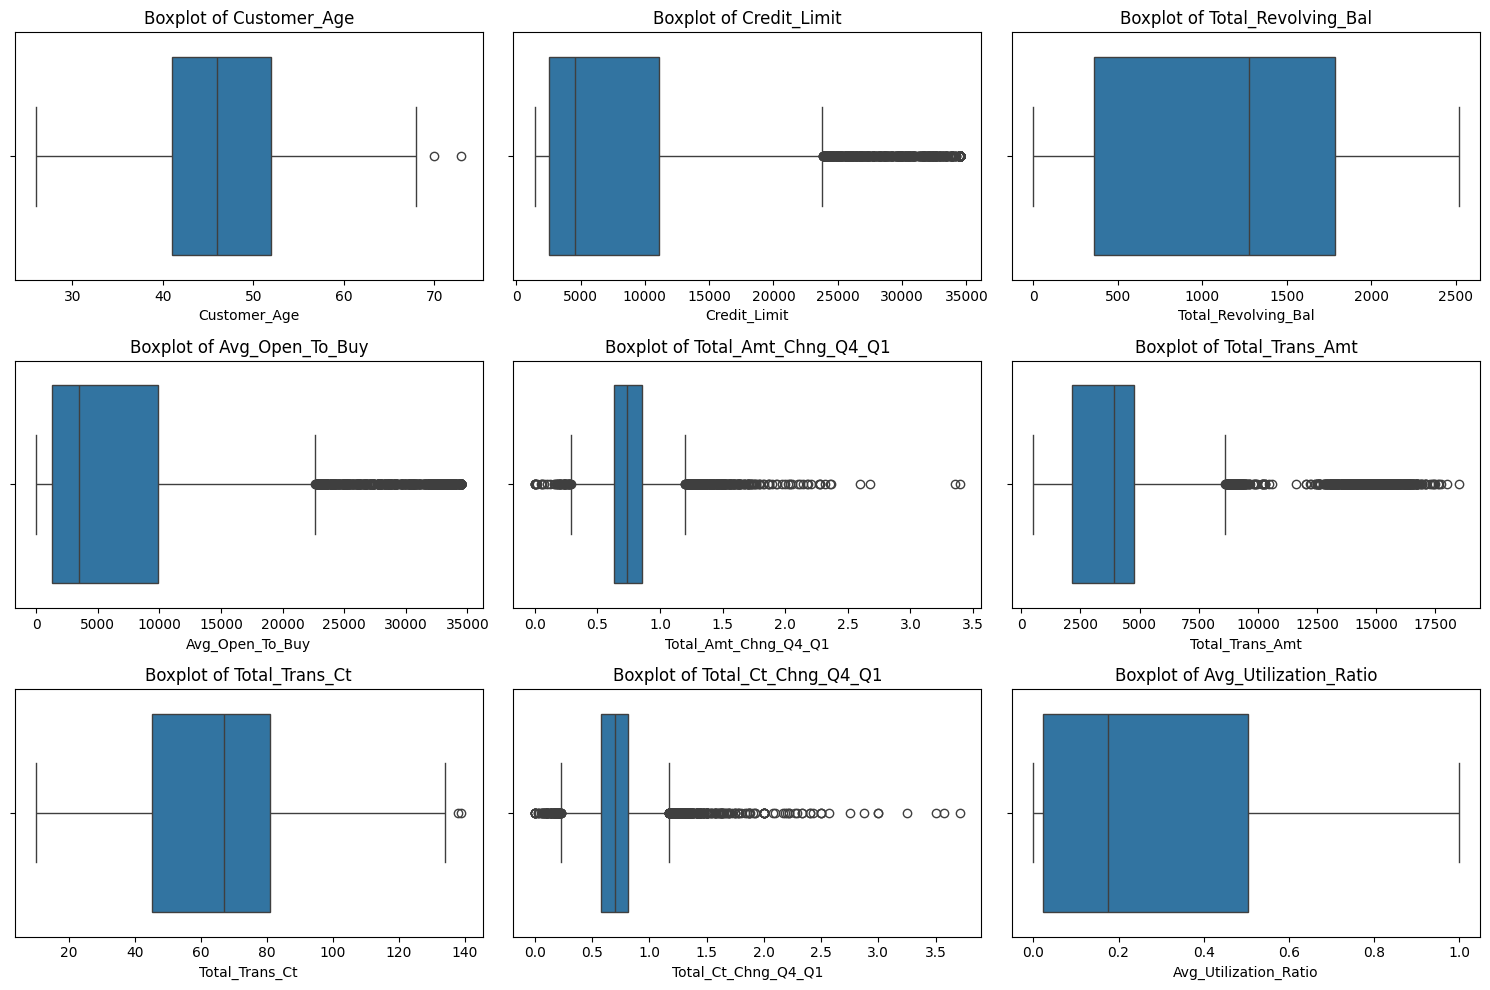

In [10]:
# Function to visualize distributions and identify outliers

def plot_distributions(data, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, start=1):
        plt.subplot(3, 3, i)
        sns.boxplot(x=data[col])
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Selecting numerical columns of interest for outlier detection
numerical_columns = [
    'Customer_Age',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio',
]

# Plot distributions for numerical columns
plot_distributions(df, numerical_columns)

From the provided boxplots, we can identify potential outliers in the following variables:

- Customer Age: There are a few outliers on the higher end, indicating customers older than the majority.
    
- Credit Limit: A few outliers exist on the higher end, suggesting customers with exceptionally high credit limits.

- Avg_Open_To_Buy: Outliers are present on the higher end, suggesting customers with unusually high open-to-buy amounts.

- Total_Amt_Chng_Q4_Q1: Some outliers are visible on the higher end, indicating customers with a significant increase in spending from Q1 to Q4.

- Total_Trans_Ct: Outliers are present on the higher end, suggesting customers with an unusually high number of transactions.
    
- Total_Ct_Chng_Q4_Q1: Outliers are visible on the higher end, indicating customers with a significant increase in the number of transactions from Q1 to Q4.

#Handling Outliers

In [13]:
df1=df.copy()

In [14]:
# Capping outliers
df1['Customer_Age'] = df1['Customer_Age'].clip(upper=65)
df1['Credit_Limit'] = df1['Credit_Limit'].clip(upper=23000)
df1['Avg_Open_To_Buy'] = df1['Avg_Open_To_Buy'].clip(upper=22000)
df1['Total_Amt_Chng_Q4_Q1'] = df1['Total_Amt_Chng_Q4_Q1'].clip(lower=0.4,upper=1.2)
df1['Total_Trans_Amt'] = df1['Total_Trans_Ct'].clip(upper=130)
df1['Total_Trans_Ct'] = df1['Total_Trans_Ct'].clip(upper=130)
df1['Total_Ct_Chng_Q4_Q1'] = df1['Total_Ct_Chng_Q4_Q1'].clip(lower=0.3,upper=1)

#After Handling Outlier

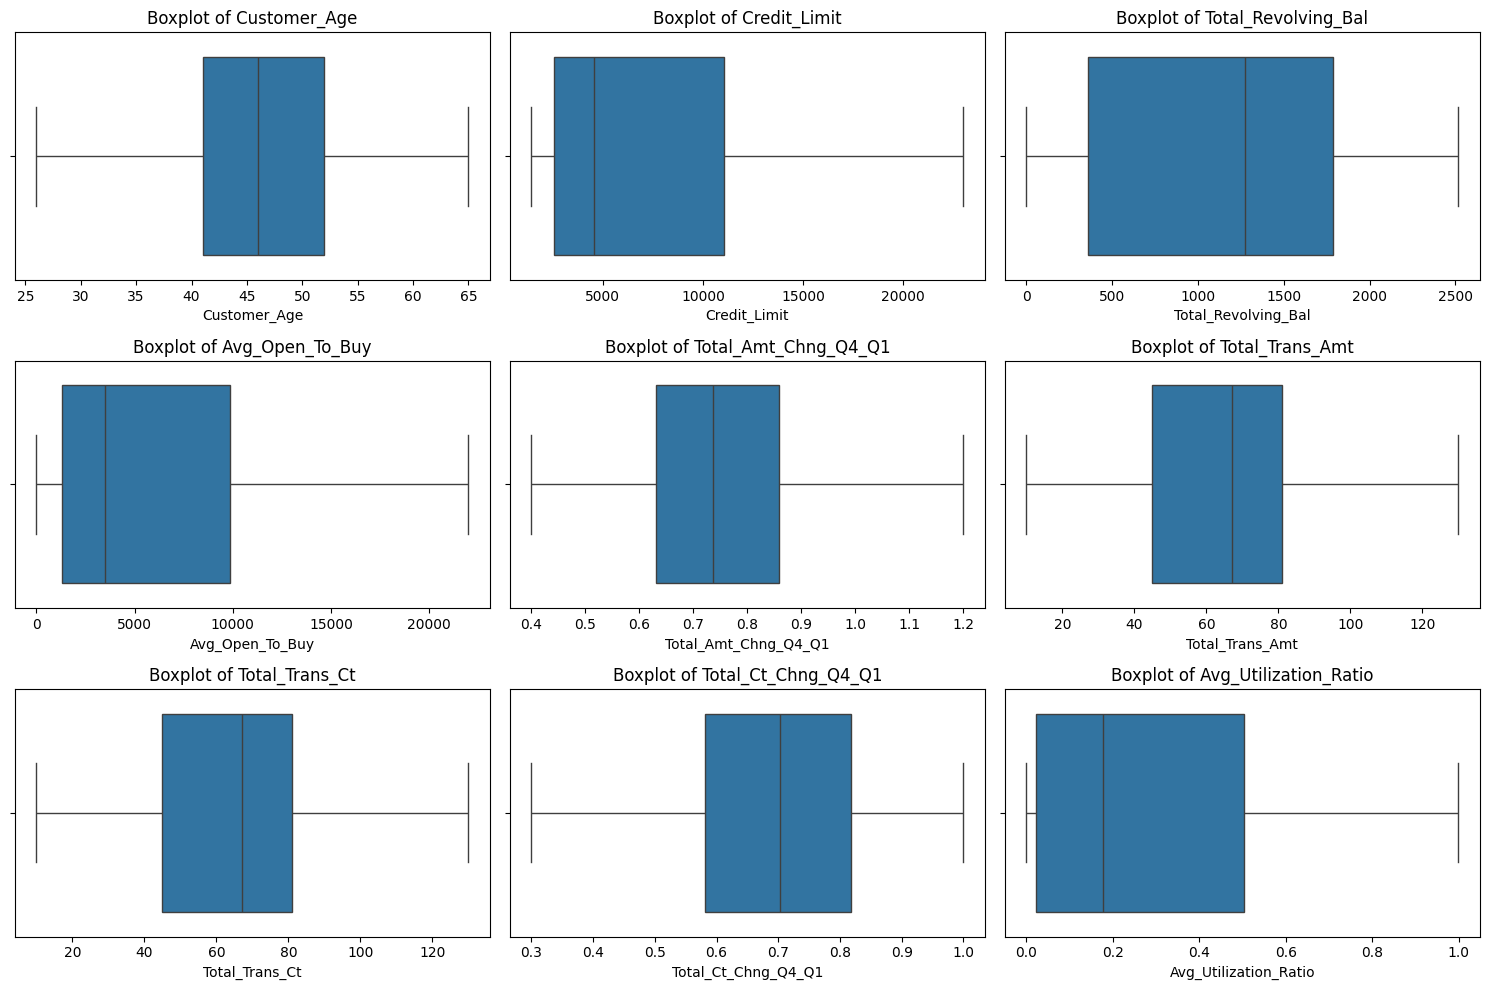

In [16]:
# Function to visualize distributions and identify outliers

def plot_distributions(data, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, start=1):
        plt.subplot(3, 3, i)
        sns.boxplot(x=data[col])
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Selecting numerical columns of interest for outlier detection
numerical_columns = [
    'Customer_Age',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio',
]

# Plot distributions for numerical columns
plot_distributions(df1, numerical_columns)

Part 2: Data Analysis and Visualization

    Customer Demographics Analysis

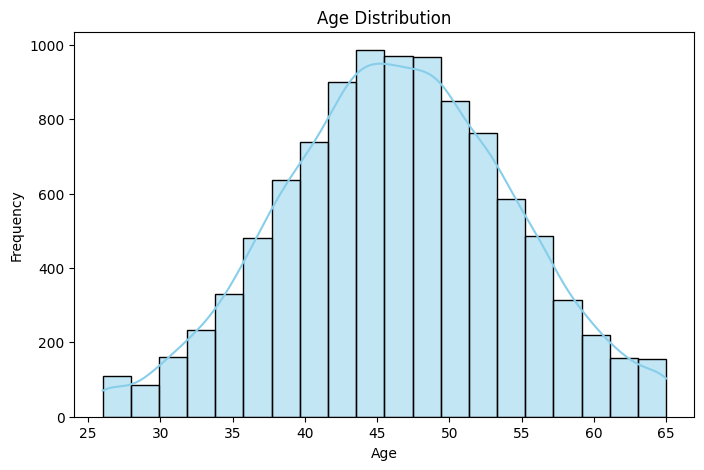

In [18]:
# 1. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df1['Customer_Age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/2474679553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df1, x=col, palette="pastel", order=df1[col].value_counts().index)


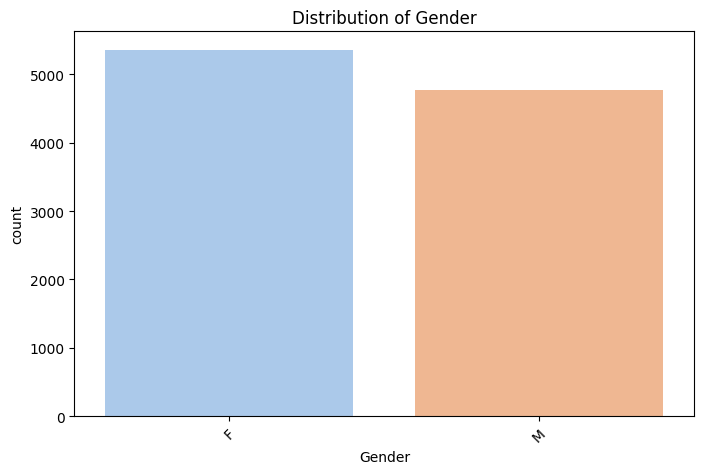

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/2474679553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df1, x=col, palette="pastel", order=df1[col].value_counts().index)


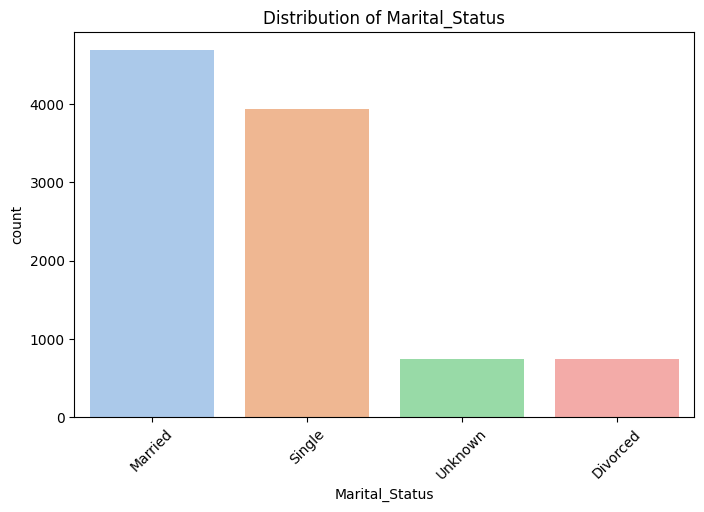

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/2474679553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df1, x=col, palette="pastel", order=df1[col].value_counts().index)


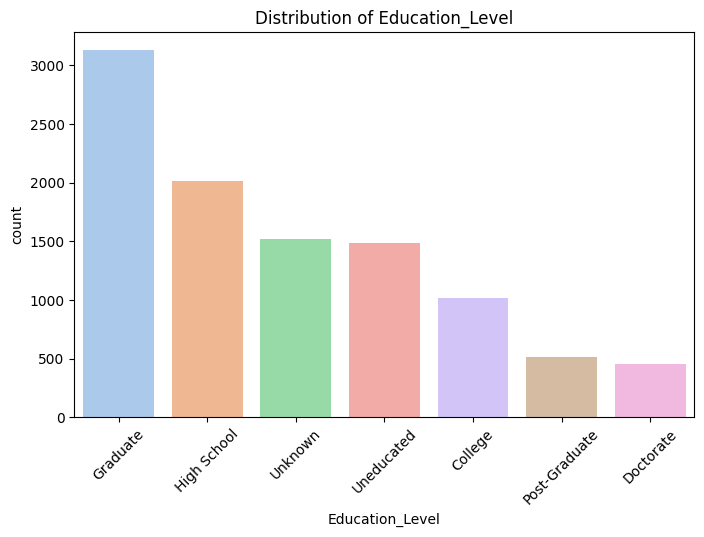

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/2474679553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df1, x=col, palette="pastel", order=df1[col].value_counts().index)


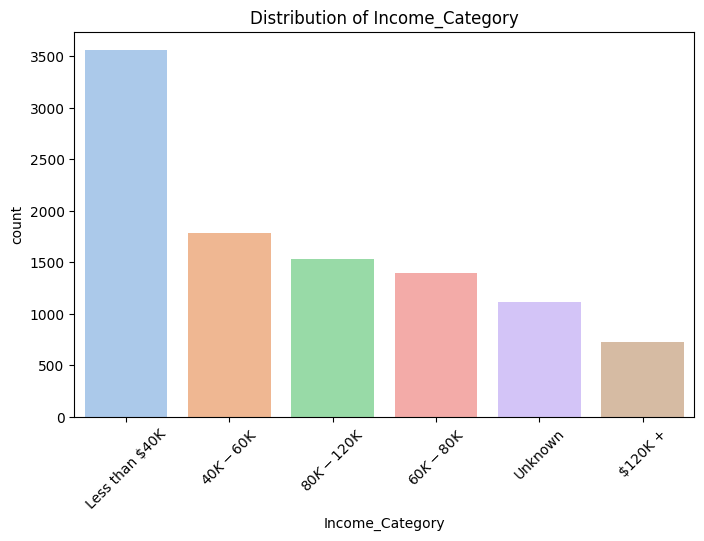

In [19]:
# 2. Categorical Demographics
categorical_cols = ['Gender', 'Marital_Status', 'Education_Level', 'Income_Category']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(df1, x=col, palette="pastel", order=df1[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/3646060245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_counts.index, y=marital_counts.values, palette="coolwarm")


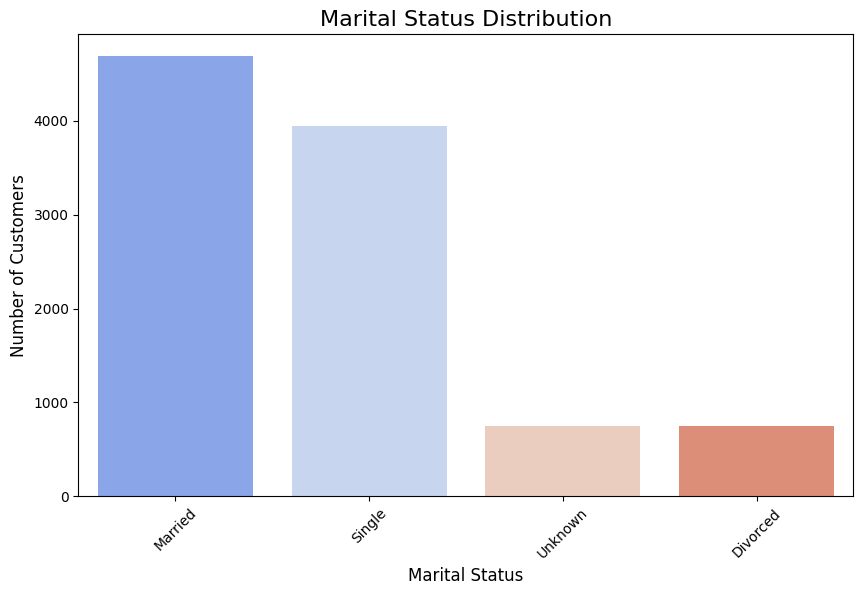

In [20]:
# 3. Marital Status Distribution
plt.figure(figsize=(10, 6))
marital_counts = df1['Marital_Status'].value_counts()
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette="coolwarm")
plt.title("Marital Status Distribution", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.show()

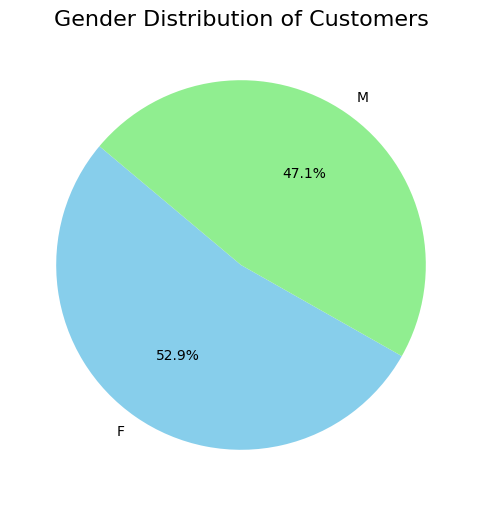

In [21]:
# 4. Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df1['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightgreen"])
plt.title("Gender Distribution of Customers", fontsize=16)
plt.show()

Credit Usage Analysis

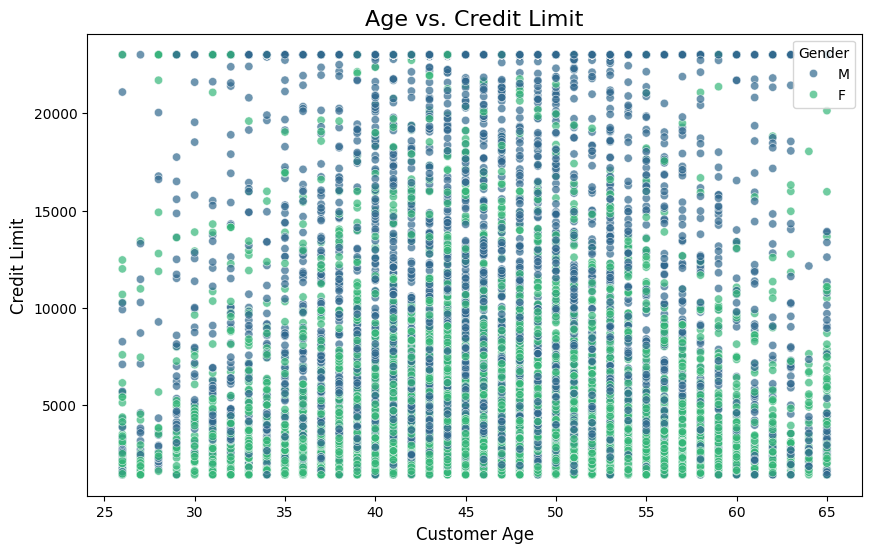

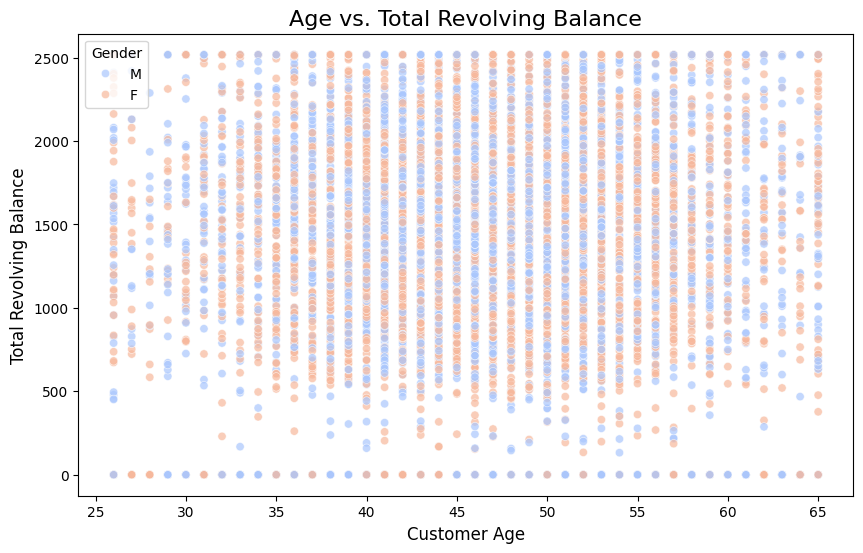

In [23]:
# 1. Age vs. Credit Limit and Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(df1, x="Customer_Age", y="Credit_Limit", hue="Gender", palette="viridis", alpha=0.7)
plt.title("Age vs. Credit Limit", fontsize=16)
plt.xlabel("Customer Age", fontsize=12)
plt.ylabel("Credit Limit", fontsize=12)
plt.legend(title="Gender")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(df1, x="Customer_Age", y="Total_Revolving_Bal", hue="Gender", palette="coolwarm", alpha=0.7)
plt.title("Age vs. Total Revolving Balance", fontsize=16)
plt.xlabel("Customer Age", fontsize=12)
plt.ylabel("Total Revolving Balance", fontsize=12)
plt.legend(title="Gender")
plt.show()

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/2958683434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df1, x="Income_Category", y="Credit_Limit", palette="Set2")


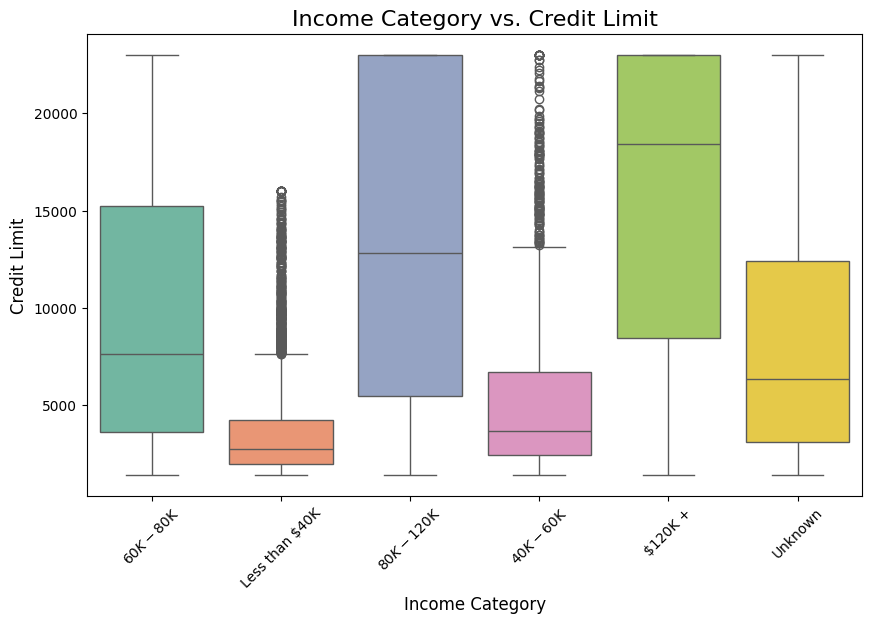

In [24]:
# 2. Income Category vs. Credit Metrics
plt.figure(figsize=(10, 6))
sns.boxplot(df1, x="Income_Category", y="Credit_Limit", palette="Set2")
plt.title("Income Category vs. Credit Limit", fontsize=16)
plt.xlabel("Income Category", fontsize=12)
plt.ylabel("Credit Limit", fontsize=12)
plt.xticks(rotation=45)
plt.show()

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/1332843927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df1, x="Marital_Status", y="Total_Revolving_Bal", palette="pastel")


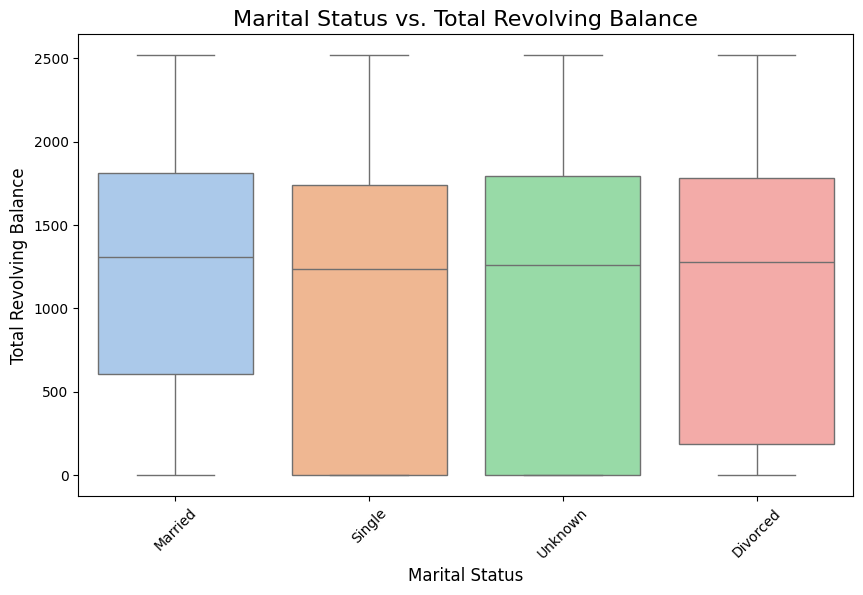

In [25]:
# 3. Marital Status vs. Credit Metrics
plt.figure(figsize=(10, 6))
sns.boxplot(df1, x="Marital_Status", y="Total_Revolving_Bal", palette="pastel")
plt.title("Marital Status vs. Total Revolving Balance", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Total Revolving Balance", fontsize=12)
plt.xticks(rotation=45)
plt.show()

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/1359359163.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(df1, x="Gender", y="Credit_Limit", palette="muted", ci=None)
/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/1359359163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df1, x="Gender", y="Credit_Limit", palette="muted", ci=None)


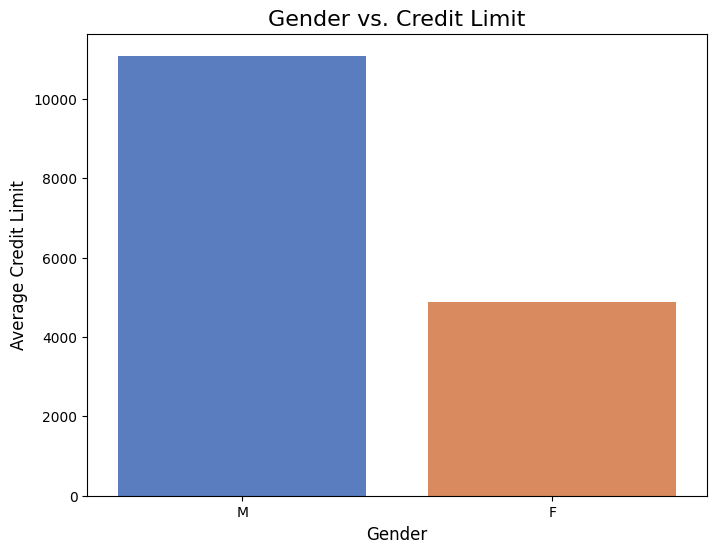

In [26]:
# 4. Gender vs. Credit Metrics
plt.figure(figsize=(8, 6))
sns.barplot(df1, x="Gender", y="Credit_Limit", palette="muted", ci=None)
plt.title("Gender vs. Credit Limit", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Credit Limit", fontsize=12)
plt.show()

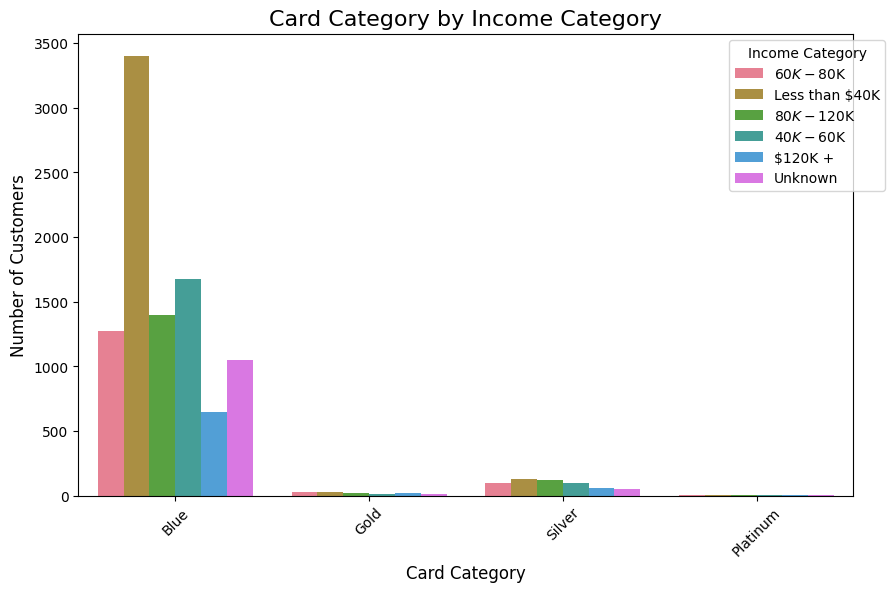

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/2946968391.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df1, x="Card_Category", y="Credit_Limit", palette="cool")


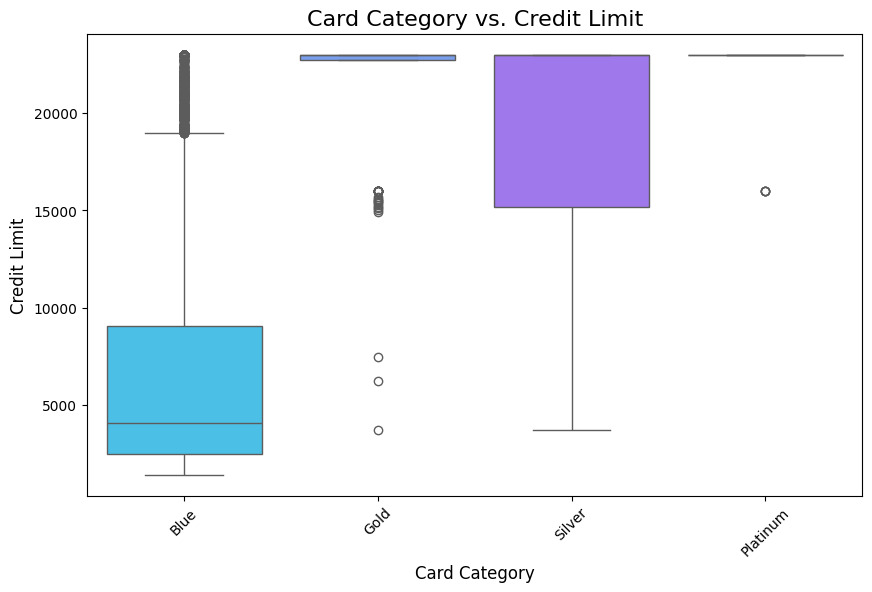

In [27]:
# 5. Card Category vs. Demographics
plt.figure(figsize=(10, 6))
sns.countplot(df1, x="Card_Category", hue="Income_Category", palette="husl")
plt.title("Card Category by Income Category", fontsize=16)
plt.xlabel("Card Category", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Income Category", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(df1, x="Card_Category", y="Credit_Limit", palette="cool")
plt.title("Card Category vs. Credit Limit", fontsize=16)
plt.xlabel("Card Category", fontsize=12)
plt.ylabel("Credit Limit", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Interesting Patterns-

- Age: Older customers might have higher credit limits and lower revolving balances.

- Income: Customers in higher income brackets are likely to have higher credit limits and use premium card categories.
    
-  Marital Status: Married customers might have higher revolving balances due to family expenses.
    
- Gender: Analyze whether there is a significant difference in credit limits or balances based on gender.
    
- Card Category: Premium card categories are expected to be associated with higher income and credit limits.

#
#
#Part 3: Customer Segmentation
    
    Segmentation Model

In [42]:
# Select relevant features for clustering
features = df1[['Customer_Age', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Revolving_Bal']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

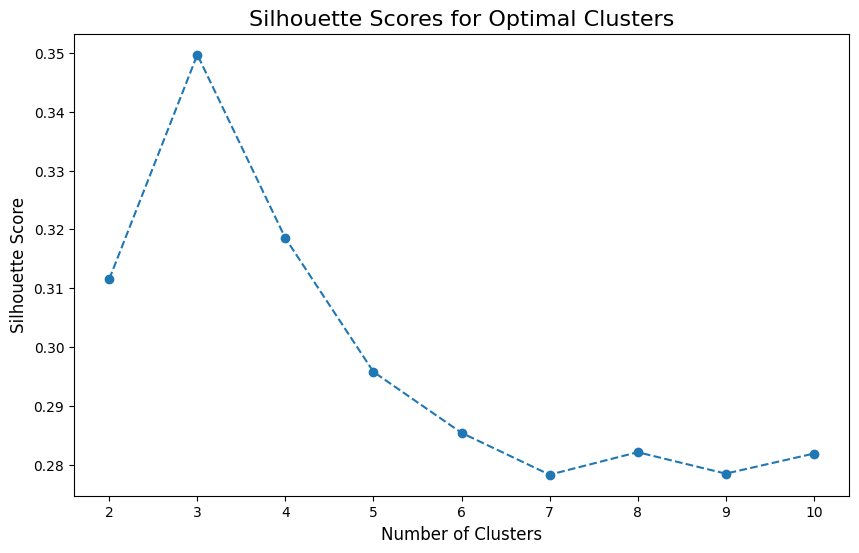

In [44]:
# Silhouette Score to validate clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Optimal Clusters", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.show()

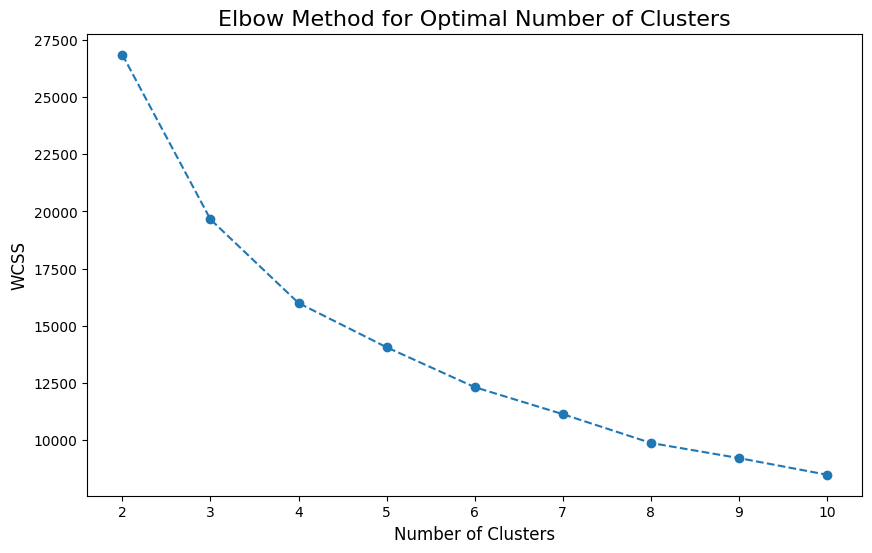

In [46]:
# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Number of Clusters", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("WCSS", fontsize=12)
plt.show()

In [48]:
# Apply K-Means with the optimal number of clusters
optimal_clusters = 4 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
df1['Cluster'] = cluster_labels

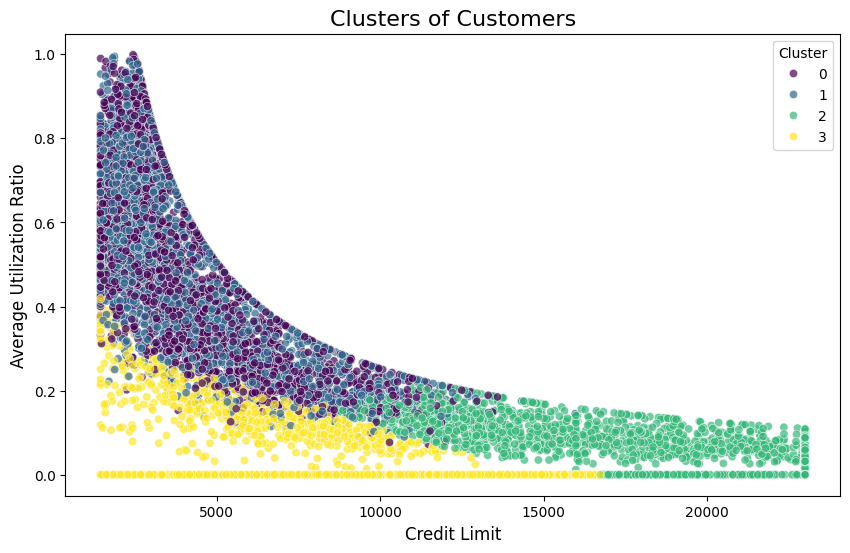

In [50]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(df1, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Cluster', palette='viridis', alpha=0.7)
plt.title("Clusters of Customers", fontsize=16)
plt.xlabel("Credit Limit", fontsize=12)
plt.ylabel("Average Utilization Ratio", fontsize=12)
plt.legend(title="Cluster")
plt.show()

In [52]:
# Analyze cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
   Customer_Age  Credit_Limit  Avg_Utilization_Ratio  Total_Revolving_Bal
0     39.321203   4017.295253               0.502068          1644.203718
1     53.628231   4088.490298               0.499814          1646.978529
2     46.318954  19194.616558               0.068129          1294.944227
3     46.085694   5195.540911               0.036297           181.148440


#
#
##Segment Analysis

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/2766358016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df1, x='Cluster', y='Credit_Limit', palette='Set2')


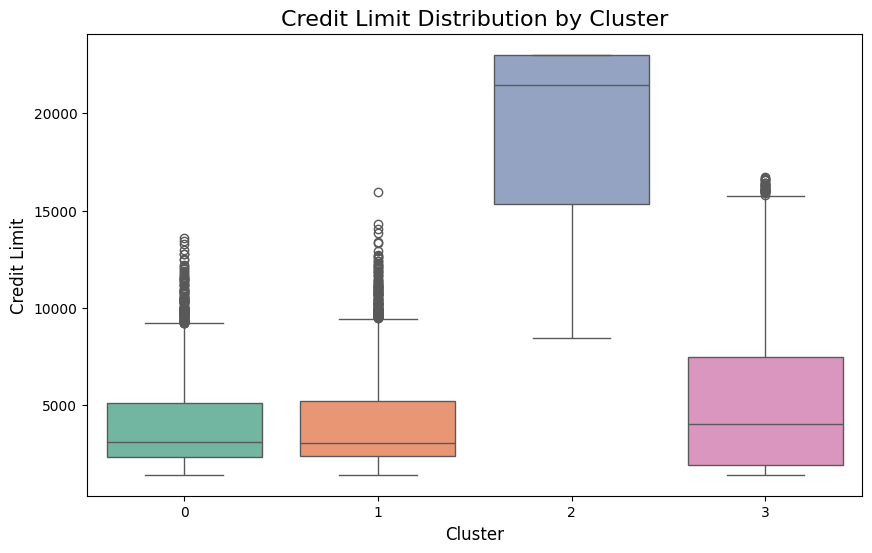

In [55]:
# Filter numeric columns
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns

# Group by clusters and calculate summary statistics
cluster_summary = df1.groupby('Cluster')[numeric_columns].mean()

# Visualize Credit Limit across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(df1, x='Cluster', y='Credit_Limit', palette='Set2')
plt.title("Credit Limit Distribution by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Credit Limit", fontsize=12)
plt.show()

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/2609424417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df1, x='Cluster', y='Avg_Utilization_Ratio', palette='coolwarm')


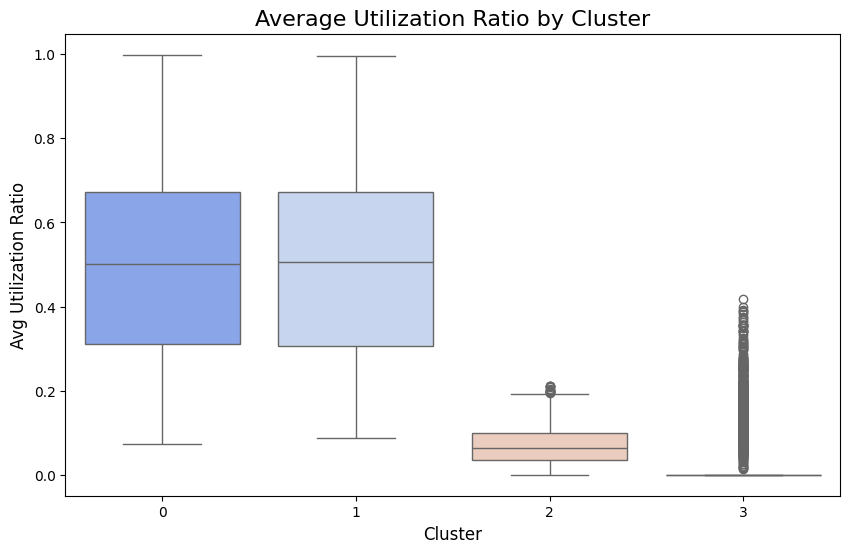

/var/folders/sp/2q6vh_9j0w1cb0bdct78zbm40000gn/T/ipykernel_1726/2609424417.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df1, x='Cluster', y='Customer_Age', palette='viridis')


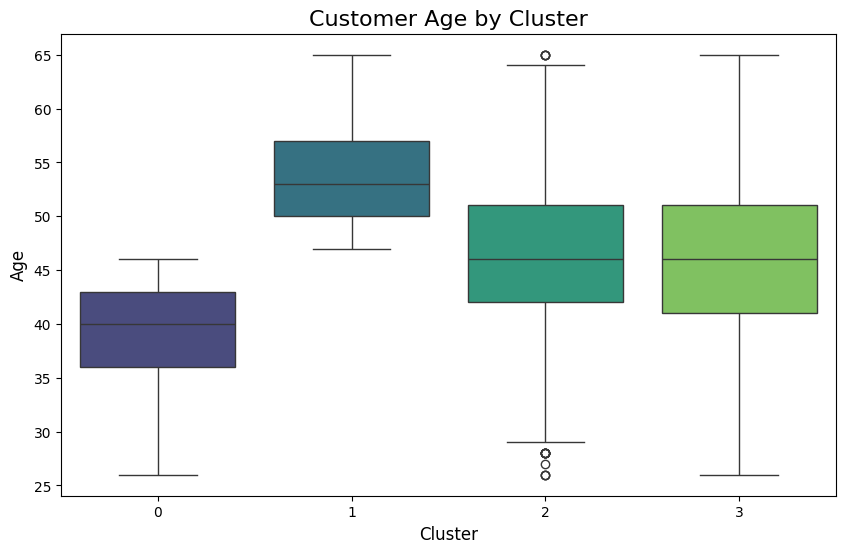

Cluster Centroids (Descaled):
   Customer_Age  Credit_Limit  Avg_Utilization_Ratio  Total_Revolving_Bal
0     39.321203   4017.295253               0.502068          1644.203718
1     53.628231   4088.490298               0.499814          1646.978529
2     46.318954  19194.616558               0.068129          1294.944227
3     46.085694   5195.540911               0.036297           181.148440
Cluster Sizes:
Cluster
3    2788
0    2531
1    2513
2    2295
Name: count, dtype: int64


In [57]:
# Visualize Average Utilization Ratio across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(df1, x='Cluster', y='Avg_Utilization_Ratio', palette='coolwarm')
plt.title("Average Utilization Ratio by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Avg Utilization Ratio", fontsize=12)
plt.show()

# Visualize Age across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(df1, x='Cluster', y='Customer_Age', palette='viridis')
plt.title("Customer Age by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

# Print cluster centroids for interpretation
print("Cluster Centroids (Descaled):")
print(centroids)

# Cluster size
cluster_sizes = df1['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)



#
Actionable Insights for targeted marketing strategies-

1: High-Credit, Low-Utilization Customers

    Characteristics:
        - High credit limits and low utilization ratios.
        - Likely rich customers with stable financial habits.

    Strategies:
        - Promote premium credit cards or exclusive benefits (e.g., travel perks, cashback).
        - Offer investment or wealth management products.
        - Personalize loyalty programs with rewards that match their lifestyle.

2: Young, High-Balance Customers

    Characteristics:
        - Younger demographic with high revolving balances.
        - May be early in their credit journey.
        
    Strategies:
        - Educate them about financial management and debt reduction.
        - Offer lower-interest rate balance transfer options.
        - Introduce credit-building tools or incentives to improve repayment behavior.
        
3: Low-Credit, High-Utilization Customers

    Characteristics:
        - Low credit limits with high utilization ratios.
        - Potential risk of default or financial distress.
        
    Strategies:
        - Provide financial counseling or repayment plans to ease financial strain.
        - Gradually increase credit limits for those with good repayment history.
        - Introduce basic rewards cards to incentivize positive behavior.
                                    
4: Mid-Income, Moderate Utilization Customers

    Characteristics:
        - Stable usage patterns with mid-tier income and credit limits.
    Strategies:
        - Cross-sell related products such as personal loans or insurance.
        - Offer seasonal rewards to boost spending on specific categories (e.g., travel, shopping).
        - Target with upgrade campaigns to higher-tier cards.

#
Part 4: Predictive Modeling
    
    Churn Prediction

In [73]:
# Encode target variable
df1['Attrition_Flag'] = LabelEncoder().fit_transform(df1['Attrition_Flag'])

# One-hot encode categorical features
categorical_cols = df1.select_dtypes(include=['object']).columns
df1 = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)

# Split features and target
X = df1.drop(columns=['Attrition_Flag'])
y = df1['Attrition_Flag']

# Train-test split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=42)


In [71]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
#LogisticRegression
lr_model=LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [83]:
predictions=lr_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))

[[  50  491]
 [  41 2760]]


In [85]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.09      0.16       541
           1       0.85      0.99      0.91      2801

    accuracy                           0.84      3342
   macro avg       0.70      0.54      0.54      3342
weighted avg       0.80      0.84      0.79      3342



In [87]:
print(metrics.accuracy_score(y_test,predictions))

0.8408138839018552


In [89]:
#RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [91]:
print(metrics.classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       541
           1       1.00      1.00      1.00      2801

    accuracy                           1.00      3342
   macro avg       1.00      1.00      1.00      3342
weighted avg       1.00      1.00      1.00      3342



In [93]:
print(metrics.accuracy_score(y_test,rf_predictions))

1.0


In [99]:
#MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [101]:
predictions=nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

[[ 325  216]
 [1340 1461]]


In [103]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.20      0.60      0.29       541
           1       0.87      0.52      0.65      2801

    accuracy                           0.53      3342
   macro avg       0.53      0.56      0.47      3342
weighted avg       0.76      0.53      0.59      3342



In [105]:
print(metrics.accuracy_score(y_test,predictions))

0.5344105326152004


#
Hence, in comparision with other models "Random Forest Classifier" have perfect  precision, recall, f1-score, support. 
Therefore, prediction made by the model was accurate.

#
Strengths and Weaknesses

Logistic Regression

    Strengths:
    
        - Simplicity and Interpretability:
        - Coefficients provide insight into the relationship between features and the target.
        - Easy to implement and interpret for linear relationships.
        - Efficiency: Fast to train, especially on large datasets with many features.
            
    Weaknesses:
    
        - Assumes Linearity: Struggles with non-linear relationships unless data is transformed or interactions are explicitly included.
        - Limited Feature Interaction: Cannot automatically handle interactions between features.
            
Random Forest

    Strengths:
    
        - Handles Non-Linear Relationships:
        - Can model complex and non-linear interactions between features.
        - Feature Importance: Provides insights into which features are most important for predictions.
        - Robustness: Resistant to overfitting due to the ensemble of decision trees (if hyperparameters are well-tuned).
            
    Weaknesses:
    
        - Complexity and Interpretability:
        - Models are harder to interpret compared to Logistic Regression.
        - Computationally Intensive:
        - Training and prediction can be slower, especially with large datasets or many features.

MultinomialNB
                                                                  
    Strengths:
    
        - Efficiency: Extremely fast and memory-efficient, especially for high-dimensional data.
        - Simple Assumptions: Works well when the features are independent.
        - Interpretability: Straightforward to interpret class probabilities.
    Weaknesses:
    
        - Feature Independence Assumption: Assumes features are conditionally independent given the target, 
          which may not hold in most real-world datasets.
        - Requires Non-Negative Features: Cannot handle negative or zero-valued features directly.
        - Less Effective for Continuous Data: MultinomialNB is designed for categorical data and may not perform 
          as well on numeric features compared to algorithms like Logistic Regression or Random Forest.
                                                                  